<a href="https://colab.research.google.com/github/AsadBukhari886/Vision_Transformers_for_Image_Recognition/blob/main/Exploring_Vision_Transformers_for_Image_Recognition_%E2%80%94_Colab_Report_by_Asad_Bukhari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Vision Transformer (ViT)
# **Paper**: "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale" (ICLR 2021)


# SECTION 1: PAPER SUMMARY

# Title: An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale
**Authors:** Alexey Dosovitskiy et al., Google Research, Brain Team  
**Published at:** ICLR 2021

## Abstract Summary
The **Vision Transformer (ViT)** applies a standard Transformer to sequences of image patches, removing the need for convolutions. With large-scale training, ViT achieves state-of-the-art image recognition with lower computational cost than comparable CNNs.

## Key Contributions
* **Pure Transformer:** Performs image classification without convolutions.  
* **Patch Tokens:** Treats image patches like words in NLP.  
* **Large-scale Pre-training:** Compensates for lack of CNN biases.  
* **High Accuracy:** Outperforms CNNs on ImageNet, CIFAR-100, and VTAB efficiently.

## Model Architecture
1. **Patch Embedding:** Images divided into fixed-size patches, flattened and projected.  
2. **[CLS] Token:** Represents the whole image for classification.  
3. **Positional Embedding:** Maintains spatial information.  
4. **Transformer Encoder:** Multi-head self-attention + MLP layers.  
5. **Classification Head:** Uses [CLS] token output.

## Experimental Results
* **Datasets:** ImageNet, ImageNet-21k, JFT-300M, CIFAR, VTAB  
* **Models:** ViT-Base (86M), ViT-Large (307M), ViT-Huge (632M)  
* **Performance:**  
  - ImageNet: 88.55% Top-1  
  - CIFAR-100: 94.55%  
  - VTAB: 77.63%  
* Pre-trained ViT outperforms ResNet with **4× less compute**.

## Insights
* **Inductive Bias:** CNNs encode priors; ViT learns them from data.  
* **Data Efficiency:** Requires large-scale pre-training; CNNs may still excel on small datasets.  
* **Interpretability:** Attention maps highlight meaningful regions.

## Conclusion
ViT introduces a new paradigm, prioritizing **scale and data over inductive bias**, and suggests potential for unified architectures across NLP and vision.


# SECTION 2: MY LEARNINGS AND INSIGHTS

# Reflections on the Paper

This paper changed how I view visual processing. It shows that **attention-based models** can learn spatial relationships directly from data, without convolutions, if trained at scale.

## Key Learnings
* **Representation Shift:** Vision can be treated as a sequential problem like language.  
* **Scalability:** Larger models and datasets improve performance.  
* **Architectural Simplicity:** Transformers perform well without convolutions.  
* **Transfer Learning:** Pre-training on large datasets is crucial for smaller benchmarks.  

## Future Implications
* Transformers could unify vision tasks, including segmentation and detection.  
* Inspires self-supervised approaches to reduce labeled data dependency.  

## Takeaway
* The balance between **inductive bias and scalability** is key.  
* Future AI may combine Transformers’ global reasoning with CNNs’ efficiency.


# SECTION 3: DEMO - VISION TRANSFORMER IN ACTION

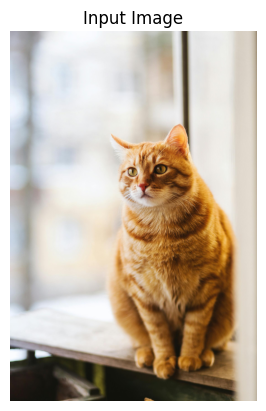

Predicted class: Egyptian cat


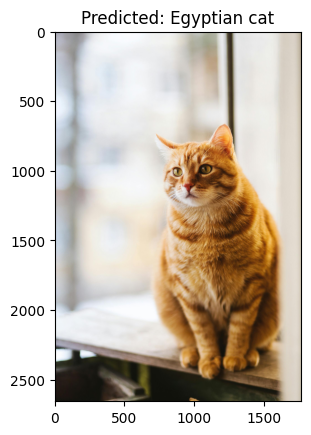

In [ ]:
!pip install -q torch torchvision transformers pillow

from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests
import torch
import matplotlib.pyplot as plt

# Load image
url = "https://images.pexels.com/photos/1170986/pexels-photo-1170986.jpeg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
# Display the image
plt.imshow(image)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Load pretrained ViT model and processor
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

# Prepare input and run inference
inputs = processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Get predicted label
predicted_class_idx = logits.argmax(-1).item()
predicted_label = model.config.id2label[predicted_class_idx]

# Display the prediction
print(f"Predicted class: {predicted_label}")
plt.imshow(image)
#plt.axis("off")
plt.title(f"Predicted: {predicted_label}")
plt.show()








